### Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
reg = LinearRegression()

In [15]:
X = [[1],[2],[3],[4],[5],[6]]
y = [2, 2.5, 4.5, 3, 5, 4.7]

In [16]:
reg.fit(X,y)

LinearRegression()

In [17]:
predicted_value = reg.predict([[5.5]])[0]
predicted_value

4.730952380952381

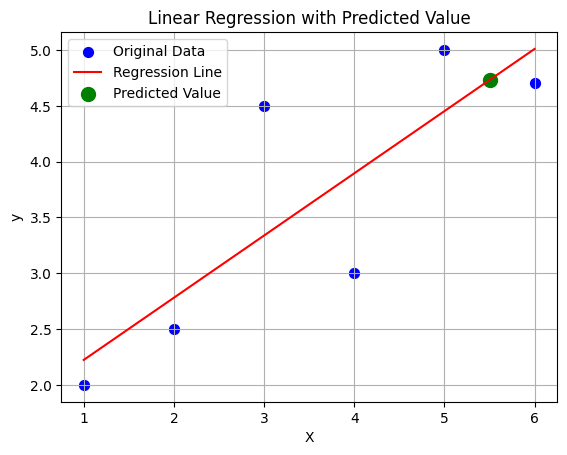

In [18]:
plt.scatter(X, y, color='blue', label='Original Data', s=50)

x_range = [[i] for i in range(1, len(X)+1)]  
y_range = reg.predict(x_range)  
plt.plot([i[0] for i in x_range], y_range, color='red', label='Regression Line')

plt.scatter([5.5], [predicted_value], color='green', label='Predicted Value', s=100)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

#### Boston Housing Price Dataset

In [3]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
X = df.drop(columns=['MEDV'])  # MEDV is the target column (price)
y = df['MEDV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)